In [1]:
import numpy as np
import pandas as pd

from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

import pickle

### Import datasets

In [2]:
data = pd.read_csv('./datasets/merged.csv')
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

train.head()

,user_id,movie_id,rating
0,1198,434,5
1,5949,1729,4
2,5046,308,5
3,3735,909,4
4,5960,2918,4


In [3]:
reader = Reader(rating_scale=(1, 5))
trainset, testset = Dataset.load_from_df(train, reader), Dataset.load_from_df(test, reader)
trainset, testset = trainset.build_full_trainset(), testset.build_full_trainset().build_testset()

## Item-based KNN collaborative filtering model 

input user_id & desired number of similar users, and will recommend movies rated by similar users  

### Why KNN?

> Simplicity and Interpretability
> Collaborative Filtering
- Algorithm recommends movies based on similarities between users (user-based collaborative filtering) or between movies (item-based collaborative filtering). 
    - Item-based filtering, KNN recommends movies similar to the ones a user has liked in the past by comparing the movie’s features.
> Good for Small to Medium Datasets
- KNN performs well on small to medium datasets without requiring extensive training. 
    - For larger datasets, optimizations or alternative models like matrix factorization or deep learning might be necessary.

> Adaptability to Feature Similarity
- KNN can be adapted to various similarity metrics, such as Euclidean distance, cosine similarity, or Pearson correlation, depending on how you define movie similarity. 
    - Cosine similarity might work well when comparing users’ rating patterns or the attributes of movies.
> Cold Start Problem
- KNN is computationally expensive when dealing with very large datasets and may not capture complex relationships between movies or users as effectively as other models (e.g., matrix factorization or deep learning).

### Distancing & Error Metric

<b> Similarity measures </b>

Cosine and Pearson similarity measures are commonly used in KNN-based collaborative filtering because they help quantify the degree of similarity between two vectors (users or items) based on their rating patterns. 

> Cosine Similarity : Measures the cosine of the angle between two non-zero vectors (such as user or item rating vectors) in an n-dimensional space

- Independent of Magnitude: Cosine similarity focuses on the direction rather than the magnitude of the vectors. if the pattern of ratings is similar, they will be considered similar.

- Good for Sparse Data: It only looks at the ratings for items both users have rated, ignoring missing values.

- Captures Similar Preferences: Cosine similarity captures how similarly users behave in terms of their preferences.

> Pearson Correlation : Measures the linear correlation between two variables. Evaluates how well the ratings of two users (or items) can be described as a linear relationship.

- Removes Rating Bias: Pearson correlation centers the ratings by subtracting the user’s average rating. Captures how users deviate from their own average behavior, allowing it to ignore differences in absolute rating levels.

- Captures Linear Relationships: Pearson correlation is useful when you’re interested in linear relationships between users or items. (Relative Preference)

- Normalizes Ratings: Normalizes ratings by subtracting the mean, Pearson correlation is effective when users have different rating scales. It focuses on the relative difference in ratings rather than absolute scores.


<B> Error metrics </b>
- MSE : Evaluates how closely the predicted ratings match the true ratings

- RMSE : Makes it more interpretable as it’s in the same units 

- MAE : Measures the average magnitude of errors between predicted and true ratings, without considering the direction

### Hyperparameter tuning

In [4]:
train_rmses, train_maes, test_rmses, test_maes = [], [], [], []
ks = list(range(38, 42, 1))

for k in ks:

    print("For k value : {} --> KNN item-based collaborative filtering model".format(k))

    sim_options = {
        'name': 'cosine',
        'user_based': False,  # Set to False to use item-based collaborative filtering
    }

    knn_model = KNNBasic(k=k, sim_options=sim_options, verbose = False)

    knn_model.fit(trainset)

    # Get predictions & accuracy for the training set
    train_predictions = knn_model.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions)
    train_mae = accuracy.mae(train_predictions)
    train_rmses.append(train_rmse)
    train_maes.append(train_mae)


    # Get predictions & accuracy for the test set
    predictions = knn_model.test(testset)

    test_rmses.append(accuracy.rmse(predictions))
    test_maes.append(accuracy.mae(predictions))


For k value : 38 --> KNN item-based collaborative filtering model
RMSE: 0.8986
MAE:  0.6987
RMSE: 0.9980
MAE:  0.7792
For k value : 39 --> KNN item-based collaborative filtering model
RMSE: 0.9000
MAE:  0.6998
RMSE: 0.9979
MAE:  0.7791
For k value : 40 --> KNN item-based collaborative filtering model
RMSE: 0.9015
MAE:  0.7010
RMSE: 0.9978
MAE:  0.7791
For k value : 41 --> KNN item-based collaborative filtering model
RMSE: 0.9028
MAE:  0.7020
RMSE: 0.9979
MAE:  0.7793


In [5]:
"""
Ks :  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
Train RMSE :  [0.7793636868439465, 0.8227726884361647, 0.8460848873582878, 0.8623359331166043, 0.8745910282979678, 0.8843737542514639, 0.8927737578256102, 0.899887388266644, 0.9061536107125806, 0.9116928308439499, 0.916684944605763, 0.9211579892038986, 0.9253347863638701, 0.929151365932699, 0.9327231288356129, 0.9360488616153929, 0.9390868669399419, 0.9419645730348497, 0.9446622809124469]
Train MAE :  [0.5924613296707559, 0.6355125161003281, 0.6556883500336964, 0.6692554913193154, 0.6793641915687684, 0.6874359526890961, 0.6944267473389668, 0.7003875921146165, 0.7057047515606564, 0.7104279002187686, 0.7148025717397848, 0.7187393011897457, 0.7224877888803295, 0.7259258406479884, 0.7291500970635431, 0.7321855318284509, 0.7350213700772928, 0.7376852465079435, 0.7402055133519454]
Test RMSE :  [1.09113468305196, 1.0367183743019732, 1.0177870555002873, 1.0090300131424663, 1.0047541674112075, 1.0020744247534925, 1.0006542860640322, 1.000071198947029, 0.9998105711557628, 0.9999995060457173, 1.000169318002006, 1.0004425712084575, 1.0008029875716187, 1.001388483876409, 1.0019836440310423, 1.0024414261504313, 1.0031280507987097, 1.003770584224303, 1.0043444603775868]
Test MAE :  [0.8438602110904961, 0.8055631163801058, 0.7919512970942335, 0.7860054060199522, 0.7832101637284969, 0.7815951812560412, 0.7808312830701344, 0.7807666191278518, 0.7809335347305092, 0.7814481397265474, 0.7819929537691004, 0.7825829464338115, 0.783273563599371, 0.7841266071262301, 0.7850367587194621, 0.7858645706406273, 0.7868422125379873, 0.7877082593358835, 0.7885813017249352]

Ks :  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Train RMSE :  [0.8942717475257902, 0.8957935969527088, 0.8972519055678716, 0.8986386377535697, 0.9000292687032027, 0.9014510006222295, 0.9027820105135707, 0.9040358289912915, 0.9052782359254624, 0.9064980744768718, 0.9076762093700568, 0.9088384925040133]
Test RMSE :  [0.9981712707454355, 0.9980943438717678, 0.9980174959136755, 0.9979906180770853, 0.9978503812223473, 0.9978326617962954, 0.9978549635986381, 0.9978028930284678, 0.9977796968525564, 0.997846133540571, 0.9979255577414622, 0.9979389558119995]
Train MAE :  [0.6950125930861831, 0.6962708848503845, 0.6975042467103026, 0.6986760400874571, 0.6997998251731598, 0.7009546382961473, 0.7020353814597728, 0.7030737614127306, 0.7041309587090449, 0.7051646598612699, 0.7061621993220617, 0.7071530187538249]
Test MAE :  [0.779068431414486, 0.7790541857052193, 0.7791363787209876, 0.7791969515526336, 0.7790736855907505, 0.7791399284605834, 0.7792536826210009, 0.7793029912219621, 0.7793505493865072, 0.7794512364340948, 0.7795369815118522, 0.7796226958429326]

"""

# Print RMSE and MAE scores of train and test set
print("Ks : ", ks)
print("Train RMSE : ", train_rmses)
print("Test RMSE : ", test_rmses)
print("Train MAE : ", train_maes)
print("Test MAE : ", test_maes)

Ks :  [38, 39, 40, 41]
Train RMSE :  [0.8986386377535697, 0.9000292687032027, 0.9014510006222295, 0.9027820105135707]
Test RMSE :  [0.9979906180770853, 0.9978503812223473, 0.9978326617962954, 0.9978549635986381]
Train MAE :  [0.6986760400874571, 0.6997998251731598, 0.7009546382961473, 0.7020353814597728]
Test MAE :  [0.7791969515526336, 0.7790736855907505, 0.7791399284605834, 0.7792536826210009]


<AxesSubplot:title={'center':'MAE of KNN clf model on k'}>

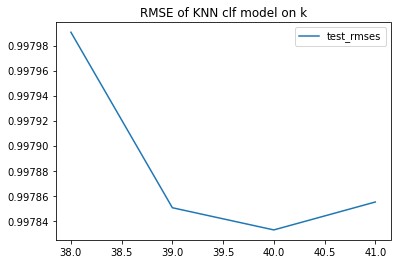

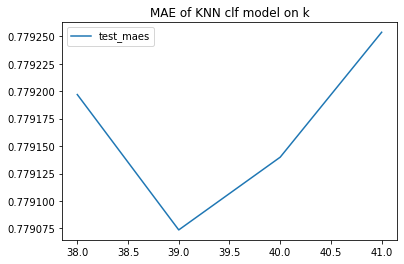

In [6]:
rmses = pd.DataFrame({
    #"train_rmses": train_rmses, 
    "test_rmses": test_rmses, 
}, index = ks
)

maes = pd.DataFrame({
    #"train_maes": train_maes,
    "test_maes": test_maes,
}, index = ks
)

rmses.plot(title= "RMSE of KNN clf model on k")
maes.plot(title= "MAE of KNN clf model on k")

### Final model development

Optimal k value is 40. Considering train_rmse, test_rmse, test_mae

In [7]:
k_value = 40

knn_clf = KNNBasic(k=k_value, sim_options={
    'name': 'cosine',
    'user_based': False,
}, verbose = False)

knn_clf.fit(trainset)

train_predictions = knn_clf.test(trainset.build_testset())
accuracy.rmse(train_predictions)
accuracy.mae(train_predictions)

predictions = knn_clf.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9015
MAE:  0.7010
RMSE: 0.9978
MAE:  0.7791


0.7791399284605834

In [8]:
# Recommend K movies for a given user with user_id.
def get_movie_recommendations(user_id, k=5):
    all_movie_ids = data['movie_id'].unique()
    
    user_rated_movies = data[data['user_id'] == user_id]['movie_id'].tolist()
    
    movie_predictions = []
    for movie_id in all_movie_ids:
        if movie_id not in user_rated_movies:
            pred = knn_clf.predict(user_id, movie_id)
            movie_predictions.append((movie_id, pred.est))
    
    movie_predictions.sort(key=lambda x: x[1], reverse=True)
    top_k_recommendations = movie_predictions[:k]
    
    return top_k_recommendations

recommendations = get_movie_recommendations(1)
print(f"Top movie recommendations for user 1: {recommendations}")

Top movie recommendations for user 1: [(3209, 5), (657, 5), (127, 5), (3323, 5), (3382, 5)]


### Save and Export final model

In [9]:
with open('./models/knn_clf.pkl', 'wb') as file:
    pickle.dump(knn_clf, file)

## Documentation & Reference 

- Surpise KNNBasic model documentation : https://surprise.readthedocs.io/en/stable/knn_inspired.html